In [1]:
#  Raghav Agarwal 21BDS0192

import numpy as np
class NeuralNetwork:
    def __init__(self):
        # Layer 1: 3 inputs, 4 neurons
        self.W1 = np.array([[0.179, 0.044, 0.010],
                            [0.044, 0.044, 0.044],
                            [0.010, 0.010, 0.010],
                            [0.088, 0.088, 0.088]])
        self.b1 = np.zeros((4, 1))

        # Layer 2: 4 inputs, 1 neuron
        self.W2 = np.array([[0.009, 0.004, -0.004, 0.000]])
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(self.W1, X) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[1]

        dZ2 = self.a2 - y
        dW2 = (1/m) * np.dot(dZ2, self.a1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dZ1 = np.dot(self.W2.T, dZ2) * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    
# Prepare the data
X = np.array([[7], [8], [10]])
y = np.array([[1]])

# Initialize the neural network
nn = NeuralNetwork()

# Training loop
learning_rate = 0.01
iterations = 500

for i in range(iterations):
    # Forward pass
    y_pred = nn.forward(X)
    
    # Backward pass
    nn.backward(X, y, learning_rate)
    
    # Print the loss every 100 iterations
    if i % 100 == 0:
        loss = np.mean(np.square(y - y_pred))
        print(f"Iteration {i}, Loss: {loss}")
        
# Final prediction
final_prediction = nn.forward(X)
print(f"Final prediction: {final_prediction[0][0]}")
print("\nRaghav Agarwal 21BDS0192")

Iteration 0, Loss: 0.24791238509935515
Iteration 100, Loss: 0.04328134180130104
Iteration 200, Loss: 0.012494123773150474
Iteration 300, Loss: 0.005521111918141831
Iteration 400, Loss: 0.003045527514050936
Final prediction: 0.9562614821581572

Raghav Agarwal 21BDS0192


Columns in the dataset:
Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

First few rows of the data:
   age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0   70    1      4                     130                322   
1   67    0      3                     115                564   
2   57    1      2                     124                261   
3   64    1      4                     128                263   
4   74    0      2                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     2   
1                    0                                     2   
2                    0                                    

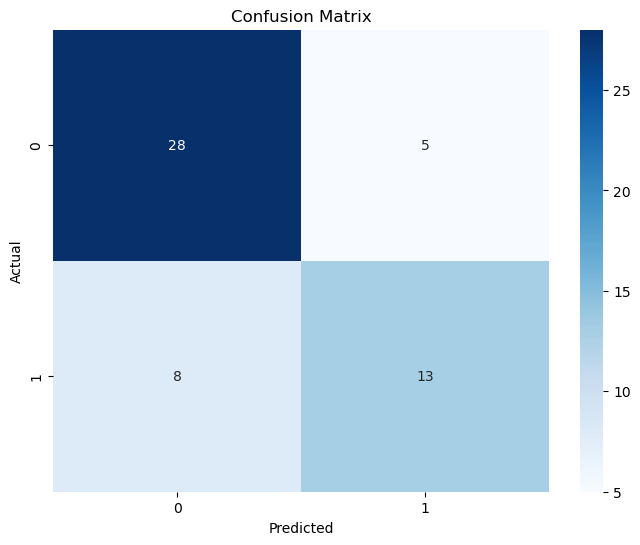

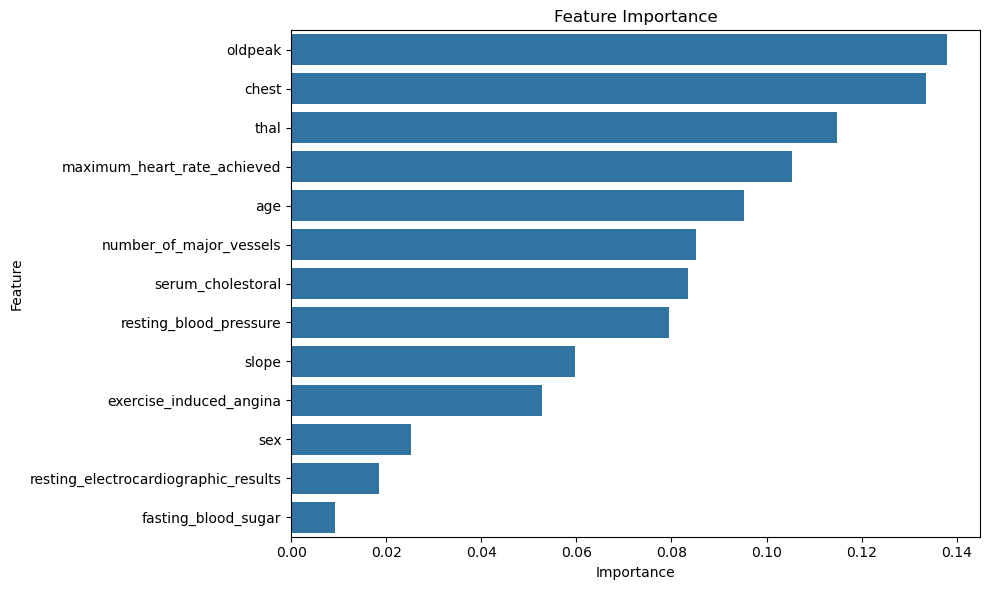


Raghav Agarwal 21BDS0192


In [3]:
# Raghav Agarwal 21BDS0192

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the data
data = pd.read_csv("heart-data.csv")


# Step 2: Explore the data
print("Columns in the dataset:")
print(data.columns)
print("\nFirst few rows of the data:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())

# Step 3: Identify the target column
# Assuming the last column is the target variable
target_column = data.columns[-1]
print(f"\nAssuming '{target_column}' as the target variable")

# Step 4: Preprocess the data
X = data.drop(target_column, axis=1) # Features
y = data[target_column] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize the results
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Feature importance
feature_importance = pd.DataFrame({
 'feature': X.columns,
 'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("\nRaghav Agarwal 21BDS0192")

In [5]:
# Raghav Agarwal 21BDS0192

import numpy as np
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((output_size, 1))
        
    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0
    
    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, Y, learning_rate):
        m = X.shape[1]
        
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
    def train(self, X, Y, epochs, learning_rate):
        for _ in range(epochs):
            A2 = self.forward(X)
            self.backward(X, Y, learning_rate)
        return A2
    
# Example usage
input_size = 3
hidden_size = 4
output_size = 3

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Example data
X = np.array([[0.5, 0.1, 0.2],
              [0.1, 0.3, 0.5],
              [0.8, 0.9, 0.1]])

Y = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# Train the network
output = nn.train(X, Y, epochs=1000, learning_rate=0.01)
print("Final output:")
print(output)
print("Raghav Agarwal")

Final output:
[[0.48212727 0.39790841 0.12738758]
 [0.39597979 0.42679733 0.20161478]
 [0.12189295 0.17529427 0.67099765]]
Raghav Agarwal


In [7]:
# Raghav Agarwal 21BDS0192

import numpy as np
import matplotlib.pyplot as plt
import random
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)


FileNotFoundError: train_X.csv not found.

In [9]:
# Raghav Agarwal 21BDS0192

import numpy as np
import matplotlib.pyplot as plt
import random
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


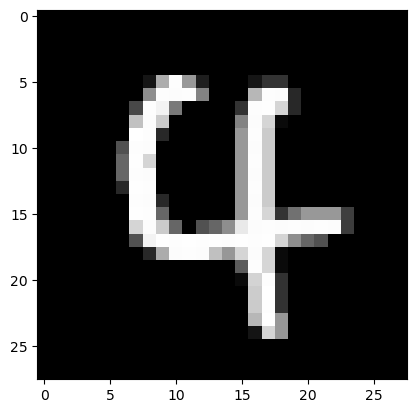

In [11]:
# Raghav Agarwal 21BDS0192

index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

In [13]:
# Raghav Agarwal 21BDS0192

def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x, 0)
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [15]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

In [17]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

In [19]:
def cost_function(a2, y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    return cost

In [21]:
def backward_prop(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    return gradients


In [23]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

In [25]:
def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_prop(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
    return parameters, cost_list

iterations = 100
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.321831128830122
Cost after 10 iterations is : 1.1813010455173527
Cost after 20 iterations is : 0.8324160759758559
Cost after 30 iterations is : 0.6660904062578648
Cost after 40 iterations is : 0.5659791841107464
Cost after 50 iterations is : 0.49720756208848654
Cost after 60 iterations is : 0.44595433587189937
Cost after 70 iterations is : 0.40564294661882344
Cost after 80 iterations is : 0.3727217283437536
Cost after 90 iterations is : 0.34508765502749666


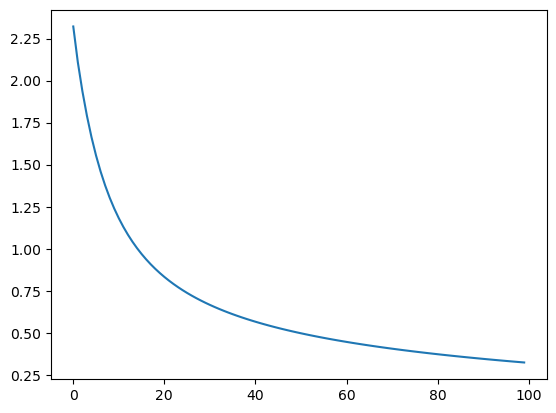

In [27]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [29]:
# Raghav Agarwal 21BDS0192

def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2'] # containes propabilities with shape(10, 1)
    a_out = np.argmax(a_out, 0) # 0 represents row wise
    labels = np.argmax(labels, 0)
    acc = np.mean(a_out == labels)*100
    return acc


In [31]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")
print("Raghav Agarwal 21BDS0192")

Accuracy of Train Dataset 95.6 %
Accuracy of Test Dataset 85.14 %
Raghav Agarwal 21BDS0192


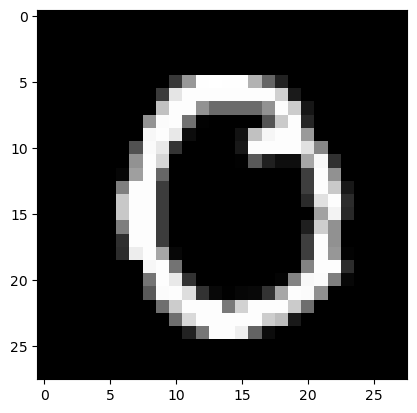

The model says it is : 0
Raghav Agarwal 21BDS0192


In [33]:
# Raghav Agarwal 21BDS0192

idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()
cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)
print("The model says it is :", a_pred[0])
print("Raghav Agarwal 21BDS0192")